In [84]:
import pandas as pd
team = pd.read_csv("teams.csv")
team

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [2]:
pip install correlation

Note: you may need to restart the kernel to use updated packages.


In [70]:
team = teams[["year","athletes","age","prev_medals","medals"]]
team

,year,athletes,age,prev_medals,medals
0,1964,8,22.0,0.0,0
1,1968,5,23.2,0.0,0
2,1972,8,29.0,0.0,0
3,1980,11,23.6,0.0,0
4,2004,5,18.6,0.0,0
...,...,...,...,...,...
2139,2000,26,25.0,0.0,0
2140,2004,14,25.1,0.0,3
2141,2008,16,26.1,3.0,4
2142,2012,9,27.3,4.0,0


In [71]:
team.corr()["medals"]

year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

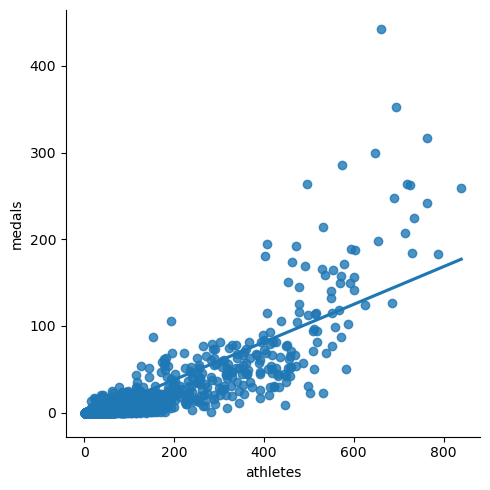

In [73]:
import seaborn as sns
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True, ci=None)#ci

<Axes: ylabel='Frequency'>

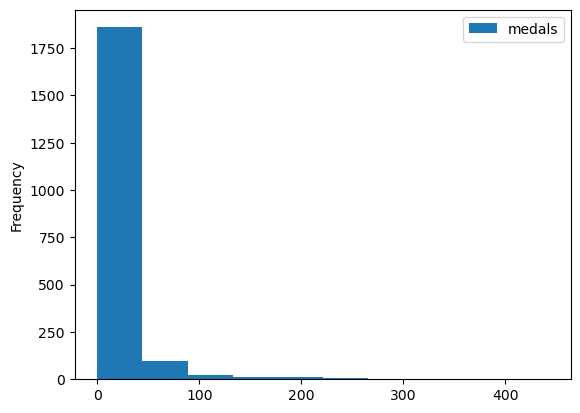

In [72]:
team.plot.hist(y="medals")

In [75]:
team[team.isnull().any(axis=1)].head(20)

,year,athletes,age,prev_medals,medals


In [17]:
teams = teams.dropna()
teams

,year,athletes,age,prev_medals,medals
0,1964,8,22.0,0.0,0
1,1968,5,23.2,0.0,0
2,1972,8,29.0,0.0,0
3,1980,11,23.6,0.0,0
4,2004,5,18.6,0.0,0
...,...,...,...,...,...
2139,2000,26,25.0,0.0,0
2140,2004,14,25.1,0.0,3
2141,2008,16,26.1,3.0,4
2142,2012,9,27.3,4.0,0


In [76]:
team.shape

(2014, 5)

In [77]:
train = team[team["year"]< 2012].copy()
test = team[team["year"] >= 2012].copy()

In [78]:
train.shape

(1609, 5)

In [79]:
from sklearn.linear_model import LinearRegression#scikit learn for checking accuracy
reg = LinearRegression()

In [80]:
predictors = ["athletes","prev_medals"]
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [40]:
predictions = reg.predict(test[predictors])

In [41]:
test["predictions"] = predictions

In [42]:
test.loc[test["predictions"] <0,"predictions"]=0

In [44]:
test["predictions"] = test["predictions"].round()

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
error = mean_absolute_error(test["medals"],test["predictions"])

In [47]:
error

3.2987654320987656

In [81]:
team.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [82]:
test["predictions"] = predictions

In [86]:
test[test["athletes"] == 689]

,year,athletes,age,prev_medals,medals,predictions
2053,2012,689,26.7,317.0,248,285.210121


In [58]:
test[test["athletes"] == 518]

,year,athletes,age,prev_medals,medals,predictions
116,2016,518,26.6,114.0,82,120.571799


In [60]:
errors = (test["medals"] - predictions).abs()

In [63]:
error_by_athletes = errors.groupby(test["athletes"]).mean()
medals_by_athletes = test["medals"].groupby(test["athletes"]).mean()
error_ratio = error_by_athletes / medals_by_athletes

In [64]:
import numpy as np
error_rate = error_ratio[np.isfinite(error_ratio)]

<Axes: xlabel='athletes'>

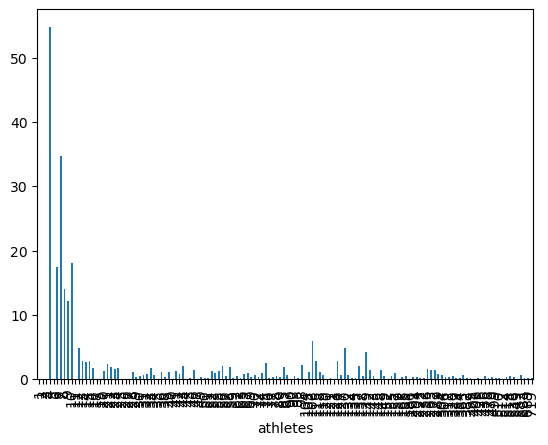

In [87]:
error_ratio.plot.bar()#have to plot hist for team as it is nt working i have used bar instead

In [66]:
error_ratio.sort_values()

athletes
145    0.000623
512    0.001266
120    0.004545
186    0.010407
405    0.011850
         ...   
40          inf
44          inf
47          inf
11          inf
1           inf
Name: medals, Length: 138, dtype: float64